<a href="https://colab.research.google.com/github/rolaabdelhadi/PSUT-Data-Analytics-Course--ML-Project--Credit-Card-Customers/blob/main/PSUT_Data_Analytics_Course_ML_Project_Credit_Card_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this study is to predectic the credit customers' attrition. Hence, the 'target' is the 'Attrition_Flag' column in the dataset.

The following steps were taken:

*   Study the dataset and create a dataframe.
*   Clean data from unknown/wrong values.
*   Study the distribution of possible factors.
*   Study the the relation between possible factors and the target (i.e., Attrition Flag).
*   Use different models for predicting customer's attrition and choose the most accurate one.

The following dataset was used:

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data


Part 1: Importing Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import math

# matplot
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn
import seaborn as sns

import plotly.express as px

# train_test_split
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# For testing the accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

# SMOTE
from imblearn.over_sampling import SMOTE

Part 2: Studying the Dataset

In [ ]:
# Reading the .csv file and assigning it to a Dataframe
cards_df = pd.read_csv("/content/BankChurners.csv")

# Displaying the first five rows of the DataFrame
cards_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# checking if there anre duplicated records
cards_df.duplicated().sum()

0

In [ ]:
# Dropping the last two columns since they are meaningless and do not affect the study

# This syntax did not work. Kept for reference.
#cards_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

# Dropping the last column
cards_df.drop(cards_df.columns[len(cards_df.columns)-1], axis=1, inplace=True)

# Dropping the column before the last, which is now the last column
cards_df.drop(cards_df.columns[len(cards_df.columns)-1], axis=1, inplace=True)

# Re-displaying the first five rows of the DataFrame after dropping the last two columns
cards_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Dropping the 'CLIENTNUM' column since it does not affect the study

cards_df.drop('CLIENTNUM', axis=1, inplace=True)

# Re-displaying the first five rows of the DataFrame after dropping the last two columns
cards_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Checking the data type for the DataFrame's columns
cards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Checking the DataFrame's number of rows
cards_df.shape[0]

10127

Part 3: Cleaning and Prepering the Data

> For that, I will do the following:

*   Convert string categorical columns into numerical values using dictionaries.
*   Replace unknown values with the ***most frequent value***.



In [ ]:
# Getting all of the defined values for the Attrition_Flag in the Dataset
cards_df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

There are NO unkown values. Defined values are either 'Existing Customer' or 'Attrited Customer'.

In [ ]:
# Replacing String Values with Numbers

# 1. Attrition_Flag

# Dictionary
Num_Attrition_Flag = {'Existing Customer': 0,'Attrited Customer': 1}

# Replacing the Values
cards_df['Attrition_Flag'] = cards_df['Attrition_Flag'].map(Num_Attrition_Flag)

# Displaying the last five records of the DataFrame after changing the Attrition_Flag column
# Not the first five records because they share the same Attrition_Flag.
cards_df.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,1,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [ ]:
# Getting all of the Genders defined in the Dataset
cards_df['Gender'].unique()

array(['M', 'F'], dtype=object)

There are NO unkown values. Defined values are either 'M' or 'F'.

In [ ]:
# 2. Gender

# Dictionary
Num_Gender = {'M': 0,'F': 1}

# Replacing the values
cards_df['Gender'] = cards_df['Gender'].map(Num_Gender)

# Displaying the first five records of the DataFrame after changing the Gender column
cards_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Getting all of the Eduacation Levels defined in the Dataset
cards_df['Education_Level'].unique()

# There ARE unkown values.

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

There **are** unkown education level values in the dataset. The other values are: 'High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', and 'Doctorate'.

In [ ]:
# Checking the number of records with an Unknow Education Level
(cards_df['Education_Level']=='Unknown').sum()

1519

There are 1,519 records with an **unknown** education level. With the total number of rows in the dataset equal to 10,127 rows. I will replace unknow values with the most frequent value instead of dropping these rows.

In [ ]:
# Checking the most frequent value for the Education Level
cards_df['Education_Level'].mode()

0    Graduate
Name: Education_Level, dtype: object

The most frequent value for the education level is 'Graduate'.

In [ ]:
 # Replacing all rows with an 'Unknow' Education Level with 'Graduate'
cards_df['Education_Level'].replace('Unknown', 'Graduate', inplace=True)

cards_df.head(15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,0,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,0,51,0,4,Graduate,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,0,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,0,37,0,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,0,48,0,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
# Re-getting all of the Education_Level defined in the Dataset
cards_df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

There are no longer unknown education levels in the dataset.

In [ ]:
# 3. Education_Level

# Dictionary
Num_Education_Level = {'Uneducated': 0,'High School': 1, 'Graduate': 2, 'College': 3, 'Post-Graduate':4, 'Doctorate':5}

# Replacing the values
cards_df['Education_Level'] = cards_df['Education_Level'].map(Num_Education_Level)

# Displaying the first five records of the DataFrame after changing the Education_Level column #
cards_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Re-checking if there are records with an Unknown Eduacation Level

cards_df['Education_Level'].unique()

array([1, 2, 0, 3, 4, 5])

There are no longer records with an Unknown Eduacation Level.

In [ ]:
# Getting all of the Marital_Status values defined in the Dataset
cards_df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

There **are** unknow martial status values. Other values are: 'Married', 'Single', and 'Divorced'.

In [ ]:
# Checking the most frequent value for the Marital Status
cards_df['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

The most frequent value for the marital status is 'Married'.

In [ ]:
# Checking the number of records with an Unknow Martial Status
(cards_df['Marital_Status']=='Unknown').sum()

749

There are 10,127 rows in the dataset, 749 of which have an **unknown** Martial Status. I will replace these records with the most frequent marital status (i.e., Married), instead of dropping these rows.

In [ ]:
# Replacing all rows with an 'Unknow' Marital Status with 'Married'
cards_df['Marital_Status'].replace('Unknown', 'Married', inplace=True)

cards_df.head(15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,0,2,2,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,0,51,0,4,2,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,0,0,1,Married,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,0,37,0,3,0,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,0,48,0,2,2,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
# Re-getting all of the Marital_Status values defined in the Dataset, after replacing unknow values with 'Married'.
cards_df['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

There are no longer records with an unknow marital status.

In [ ]:
# 4. Martial Status

# Dictionary
Num_Martial_Status = {'Married': 0,'Single': 1, 'Divorced': 2}

# Replacing the values
cards_df['Marital_Status'] = cards_df['Marital_Status'].map(Num_Martial_Status)

# Displaying the first five records of the DataFrame after changing the Martial Status column
cards_df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,0,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,1,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,0,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,0,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,0,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Re-getting all of the Marital_Status values defined in the Dataset, after replacing string values with number.
cards_df['Marital_Status'].unique()

array([0, 1, 2])

The only marital status values in the dataset are now 0, 1, and 2 (i.e., married, single, and divorced in that order).

In [ ]:
# Getting all of the Income Categories defined in the Dataset
cards_df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

The defined income categories are:


*   '$60K - $80K'
*   'Less than $40K'

*   '$80K - $120K'
*   '$40K - $60K'

*   '$120K +'
*   'Unknown'










In [ ]:
# Checking the number of records with an Unknow Income Category
(cards_df['Income_Category']=='Unknown').sum()

1112

There are 1,112 records with an **unknown** income category. With the total number of rows in the dataset equal to 10,127 rows, I will replace these unknow values with the most frequent income category, instead of dropping these rows.

In [ ]:
# Checking the most frequent value for the Income Category
cards_df['Income_Category'].mode()

0    Less than $40K
Name: Income_Category, dtype: object

The most frequent value for the income category is 'Less than $40K'.

In [ ]:
# Replacing all rows with an 'Unknow' Income Category with 'Less than $40K'
cards_df['Income_Category'].replace('Unknown', 'Less than $40K', inplace=True)

cards_df.head(15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,0,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,1,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,0,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,0,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,0,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,0,2,2,0,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,0,51,0,4,2,0,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,0,0,1,0,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,0,37,0,3,0,1,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,0,48,0,2,2,1,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
# Re-getting all of the Income Category values defined in the Dataset, after replacing Unknow values with Less than $40K.
cards_df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

The only income categories are now:


*   '$60K - $80K'
*   'Less than $40K'

*   '$80K - $120K'
*   '$40K - $60K'

*   '$120K +'

There are no longer unknow income values.


In [ ]:
# 5. Income Category

# Dictionary
Num_Income_Category = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}

# Replacing the values
cards_df['Income_Category'] = cards_df['Income_Category'].map(Num_Income_Category)

# Displaying the first five records of the DataFrame after changing the Income_Category column
cards_df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,0,2,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,1,0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,0,3,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,0,0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,0,2,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,0,2,2,0,1,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,0,51,0,4,2,0,4,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,0,0,1,0,2,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,0,37,0,3,0,1,2,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,0,48,0,2,2,1,3,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
# Re-checking all of the Income Category values defined in the Dataset, after replacing string values with numbers.
cards_df['Income_Category'].unique()

array([2, 0, 3, 1, 4])

The Income Category values are now either 0, 1, 2, 4, or 4.

In [ ]:
# Getting all of the Card_Category values defined in the Dataset
cards_df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

There are **no** unknow card category values. Defined values are either 'Blue', 'Gold', 'Silver', or 'Platinum'.

Hence, we only need to replace the strings with numbers using a dictionary.

In [ ]:
# 6. Card Category

# Dictionary
Num_Card_Category = {'Blue': 0,'Gold': 1, 'Silver': 2, 'Platinum': 3}

# Replacing the values
cards_df['Card_Category'] = cards_df['Card_Category'].map(Num_Card_Category)

# Displaying the first five records of the DataFrame after changing the Card Category column
cards_df.head(15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,1,0,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,2,1,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,2,0,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,1,0,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,0,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,0,2,2,0,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,0,51,0,4,2,0,4,1,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,0,0,1,0,2,2,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,0,37,0,3,0,1,2,0,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,0,48,0,2,2,1,3,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


All values are now numerical. Now, we need to replace other originally numerical values if unknown with the **mean value**.

In [ ]:
# Getting all of the Customer_Age defined in the Dataset
cards_df['Customer_Age'].unique()

array([45, 49, 51, 40, 44, 32, 37, 48, 42, 65, 56, 35, 57, 41, 61, 47, 62,
       54, 59, 63, 53, 58, 55, 66, 50, 38, 46, 52, 39, 43, 64, 68, 67, 60,
       73, 70, 36, 34, 33, 26, 31, 29, 30, 28, 27])

There are **no** unknown customer ages.

In [ ]:
# Getting all of the Dependent_count defined in the Dataset
cards_df['Dependent_count'].unique()

array([3, 5, 4, 2, 0, 1])

There are **no** unknown values for Dependent_count.

Note that from the data card, the Dependent_count is a demographic variable, and it means the number of dependents.

In [ ]:
# Getting all of the Months_on_book defined in the Dataset
cards_df['Months_on_book'].unique()

array([39, 44, 36, 34, 21, 46, 27, 31, 54, 30, 48, 37, 56, 42, 49, 33, 28,
       38, 41, 43, 45, 52, 40, 50, 35, 47, 32, 20, 29, 25, 53, 24, 55, 23,
       22, 26, 13, 51, 19, 15, 17, 18, 16, 14])

There are no unknown values for Months_on_book.

Note that from the data card, the Months_on_book is the period of relationship with bank.

In [ ]:
# Getting all of the Total_Relationship_Count defined in the Dataset
cards_df['Total_Relationship_Count'].unique()

array([5, 6, 4, 3, 2, 1])

There are no unknown values for Total_Relationship_Count.

Note that from the data card, the Total_Relationship_Count is total number of products held by the customer.

In [ ]:
# Getting all of the Months_Inactive_12_mon defined in the Dataset
cards_df['Months_Inactive_12_mon'].unique()

array([1, 4, 2, 3, 6, 0, 5])

There are no unknown values for Months_Inactive_12_mon.

Note that from the data card, the Months_Inactive_12_mon is the number of months inactive in the last 12 months.

In [ ]:
# Getting all of the Contacts_Count_12_mon defined in the Dataset
cards_df['Contacts_Count_12_mon'].unique()

array([3, 2, 0, 1, 4, 5, 6])

There are no unknown values for Contacts_Count_12_mon.

Note that from the data card, the Contacts_Count_12_mon is the number of Contacts in the last 12 months.

In [ ]:
# Checking if there are null values for the Credit_Limit in the Dataset
# Hard to use unique since there are various card limits.

count = 0

for i in cards_df['Credit_Limit']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print('The number of unknown credit limits equals', count)

The number of unknown credit limits equals 0


There are no unknown values for the credit limit.

In [ ]:
# Checking if there are null values for the Total_Revolving_Bal in the Dataset
# Hard to use unique since there are various total revolving balances.

count = 0

for i in cards_df['Total_Revolving_Bal']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print('The number of unknown total revolving balances equals', count)

The number of unknown total revolving balances equals 0


There are no unknown values for the total revolving balance.

In [ ]:
# Checking if there are null values for the Avg_Open_To_Buy in the Dataset
# Hard to use unique since there are various Avg_Open_To_Buy values.

count = 0

for i in cards_df['Avg_Open_To_Buy']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print("The number of unknown 'Average Open to Buy' equals", count)

The number of unknown 'Average Open to Buy' equals 0


There are no unknown values for the 'Average Open to Buy'.

Noting from the data card, the Average Open to Buy is the open to Buy Credit Line (Average of last 12 months).

In [ ]:
# Checking if there are null values for the Total_Amt_Chng_Q4_Q1 in the Dataset
# Hard to use unique since there are various Total_Amt_Chng_Q4_Q1 values.

count = 0

for i in cards_df['Total_Amt_Chng_Q4_Q1']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print("The number of unknown 'Total_Amt_Chng_Q4_Q1' equals", count)

The number of unknown 'Total_Amt_Chng_Q4_Q1' equals 0


There are no unknown values for the 'Total_Amt_Chng_Q4_Q1'.

Noting from the data card, the 'Total_Amt_Chng_Q4_Q1' is the change in the transaction amount (quarter 4 over quarter 1).

In [ ]:
# Checking if there are null values for the Total_Trans_Amt in the Dataset
# Hard to use unique since there are various Total_Trans_Amt values.

count = 0

for i in cards_df['Total_Trans_Amt']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print("The number of unknown 'Total_Trans_Amt' equals", count)

The number of unknown 'Total_Trans_Amt' equals 0


There are no unknown values for the 'Total_Trans_Amt'.

Noting from the data card, the 'Total_Trans_Amt' is the total transaction ***amount*** (for the last 12 months).

In [ ]:
# Checking if there are null values for the Total_Trans_Ct in the Dataset
# Hard to use unique since there are various Total_Trans_Ct values.

count = 0

for i in cards_df['Total_Trans_Ct']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print("The number of unknown 'Total_Trans_Ct' equals", count)

The number of unknown 'Total_Trans_Ct' equals 0


There are no unknown values for the 'Total_Trans_Ct'.

Noting from the data card, the 'Total_Trans_Ct' is the total transaction ***count*** (for the last 12 months).

In [ ]:
# Checking if there are null values for the Total_Ct_Chng_Q4_Q1 in the Dataset
# Hard to use unique since there are various Total_Ct_Chng_Q4_Q1 values.

count = 0

for i in cards_df['Total_Ct_Chng_Q4_Q1']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print("The number of unknown 'Total_Ct_Chng_Q4_Q1' equals", count)

The number of unknown 'Total_Ct_Chng_Q4_Q1' equals 0


There are no unknown values for the 'Total_Ct_Chng_Q4_Q1'.

Noting from the data card, the 'Total_Ct_Chng_Q4_Q1' is the ***change*** in transaction ***count*** (quarter 4 over quarter 1).

In [ ]:
# Checking if there are null values for the Avg_Utilization_Ratio in the Dataset
# Hard to use unique since there are various Avg_Utilization_Ratio values.

count = 0

for i in cards_df['Avg_Utilization_Ratio']:
  if i == 'Unknown' or i == 'N/A' or i == 'N\A':
    count = count + 1

print("The number of unknown 'Avg_Utilization_Ratio' equals", count)

The number of unknown 'Avg_Utilization_Ratio' equals 0


There are no unknown values for the 'Avg_Utilization_Ratio'.

Noting from the data card, the 'Avg_Utilization_Ratio' is the average card utilization ratio.

In [ ]:
cards_df.shape[0]

10127

In [ ]:
cards_df.dropna(inplace = True)

In [ ]:
cards_df.shape[0]

10127

There number of rows before and after dropna are the same. Therefore, there are no rows with null values.

Part 4: Visualizing the Data

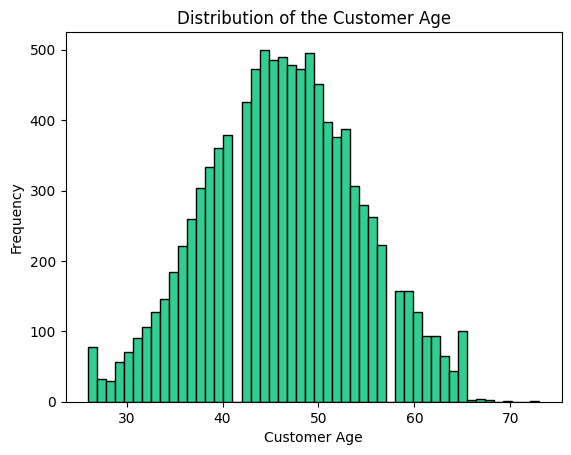

In [ ]:
# 4.1. Customer Age

# Distribution using Histogram
plt.hist(cards_df['Customer_Age'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Customer Age')

plt.ylabel('Frequency')

plt.title('Distribution of the Customer Age')

plt.show()

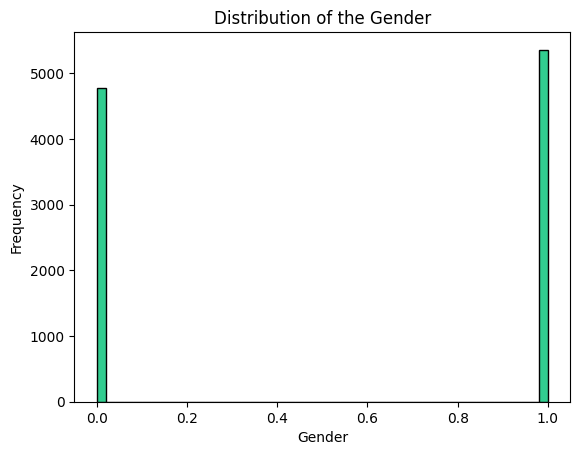

In [ ]:
# 4.2. Gender

# Distribution using Histogram
plt.hist(cards_df['Gender'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Gender')

plt.ylabel('Frequency')

plt.title('Distribution of the Gender')

plt.show()

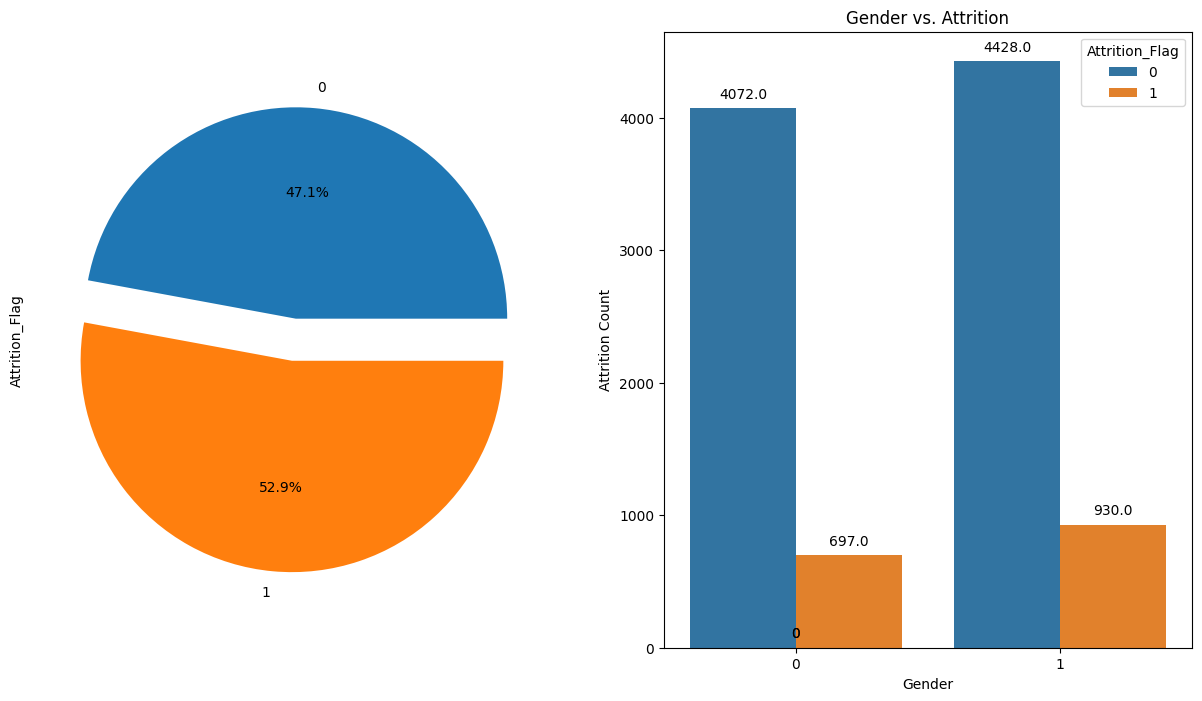

In [ ]:
# Gender vs Attrition using countplot

# Countplot shows the counts of observations in each categorical bin using bars.

# Definning the figure
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

explode = [0.1, 0.1]

cards_df.groupby('Gender')['Attrition_Flag'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);
ax = sns.countplot(x="Gender", hue="Attrition_Flag", data=cards_df,ax=axb[1])

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting labels and title
plt.title("Gender vs. Attrition")
plt.xlabel("Gender")
plt.ylabel("Attrition Count")

# Showing the plot
plt.show()

Both males and females' attrition rate is similar. Not a strong feature.

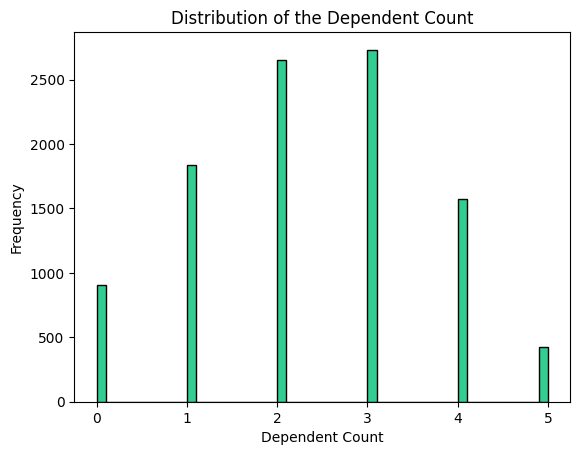

In [ ]:
# 4.3. Dependent_count

# Distribution using Histogram
plt.hist(cards_df['Dependent_count'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Dependent Count')

plt.ylabel('Frequency')

plt.title('Distribution of the Dependent Count')

plt.show()

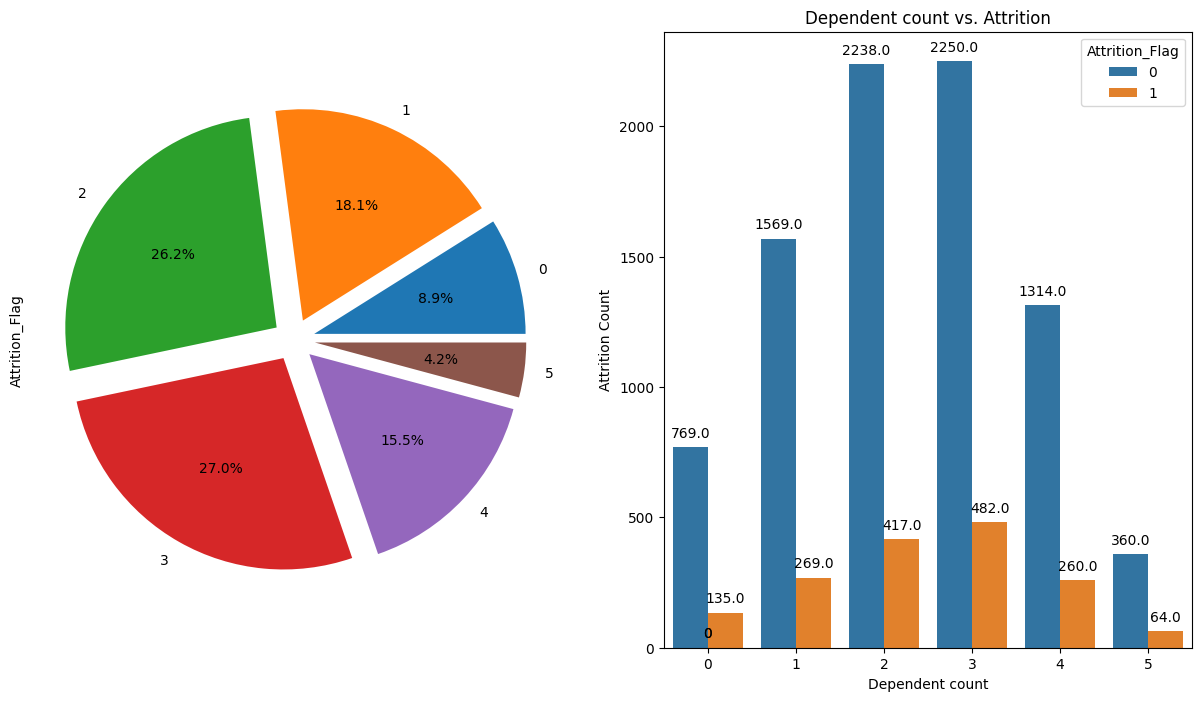

In [ ]:
# Dependent_count vs Attrition using countplot

# Definning the figure
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

cards_df.groupby('Dependent_count')['Attrition_Flag'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);
ax = sns.countplot(x="Dependent_count", hue="Attrition_Flag", data=cards_df,ax=axb[1])

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting labels and title
plt.title("Dependent count vs. Attrition")
plt.xlabel("Dependent count")
plt.ylabel("Attrition Count")

# Showing the plot
plt.show()

Dependent counts 2 and 3 have a higher attrition.



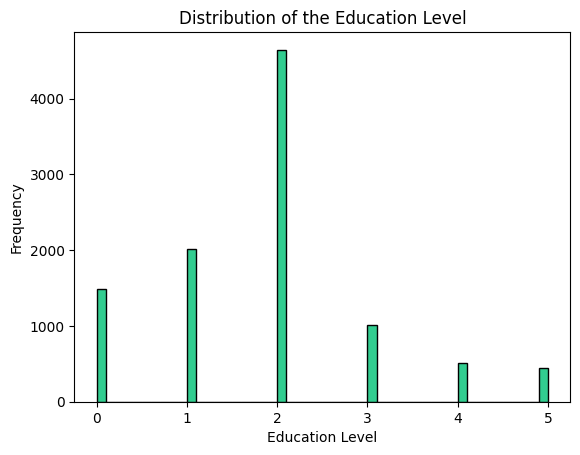

In [ ]:
# 4.4. Education_Level

# Distribution using Histogram
plt.hist(cards_df['Education_Level'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Education Level')

plt.ylabel('Frequency')

plt.title('Distribution of the Education Level')

plt.show()

Education level 2 'Collage' is more frequent.

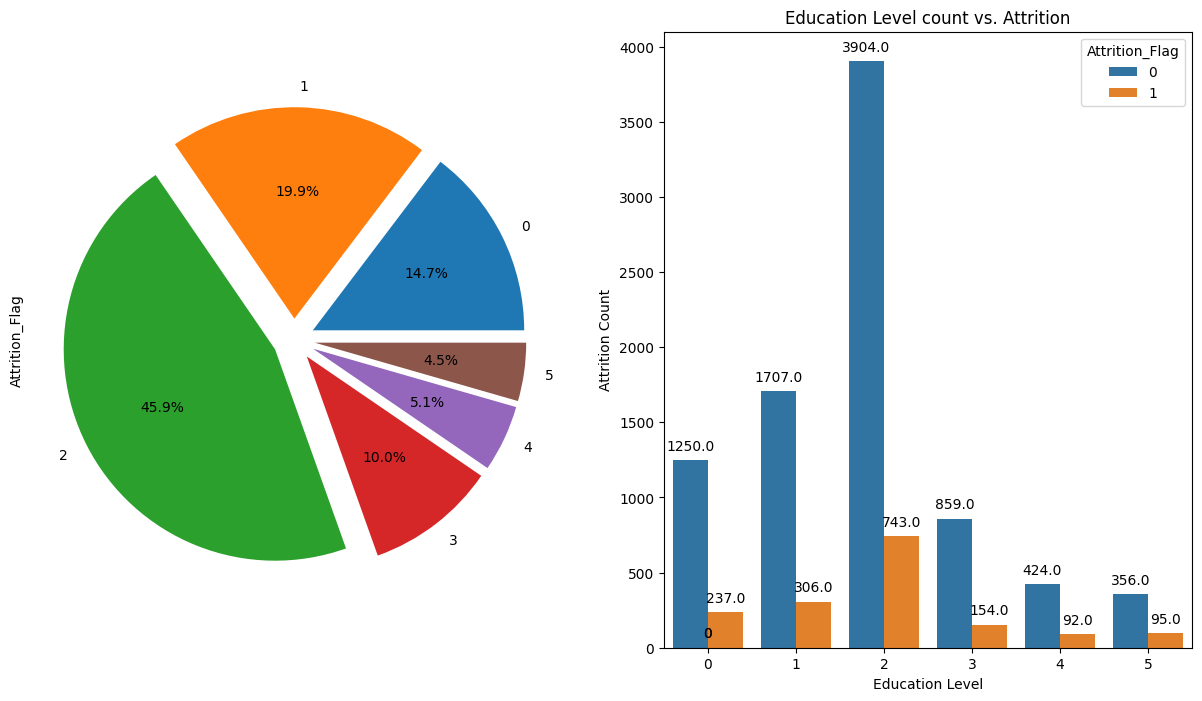

In [ ]:
# Education Level vs Attrition using countplot

# Definning the figure
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

cards_df.groupby('Education_Level')['Attrition_Flag'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);
ax = sns.countplot(x="Education_Level", hue="Attrition_Flag", data=cards_df,ax=axb[1])

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting labels and title
plt.title("Education Level count vs. Attrition")
plt.xlabel("Education Level")
plt.ylabel("Attrition Count")

# Showing the plot
plt.show()

Customers with a 'Graduate' education level have a higher attrition.

Reminder:

'Uneducated'   : 0
'High School'  : 1,
'Graduate'     : 2,
'College'      : 3,
'Post-Graduate':4,
'Doctorate'    :5

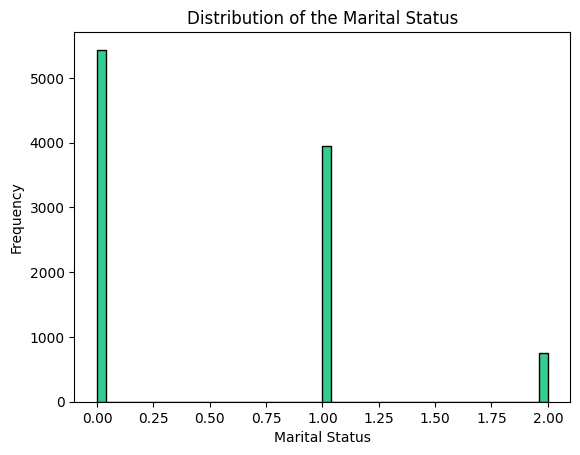

In [ ]:
# 4.5. Marital_Status

# Distribution using Histogram
plt.hist(cards_df['Marital_Status'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Marital Status')

plt.ylabel('Frequency')

plt.title('Distribution of the Marital Status')

plt.show()

Marital status 0 'Single' is more frequent.

Reminder:

*   Married : 0
*   Single  : 1

*   Divorced: 2



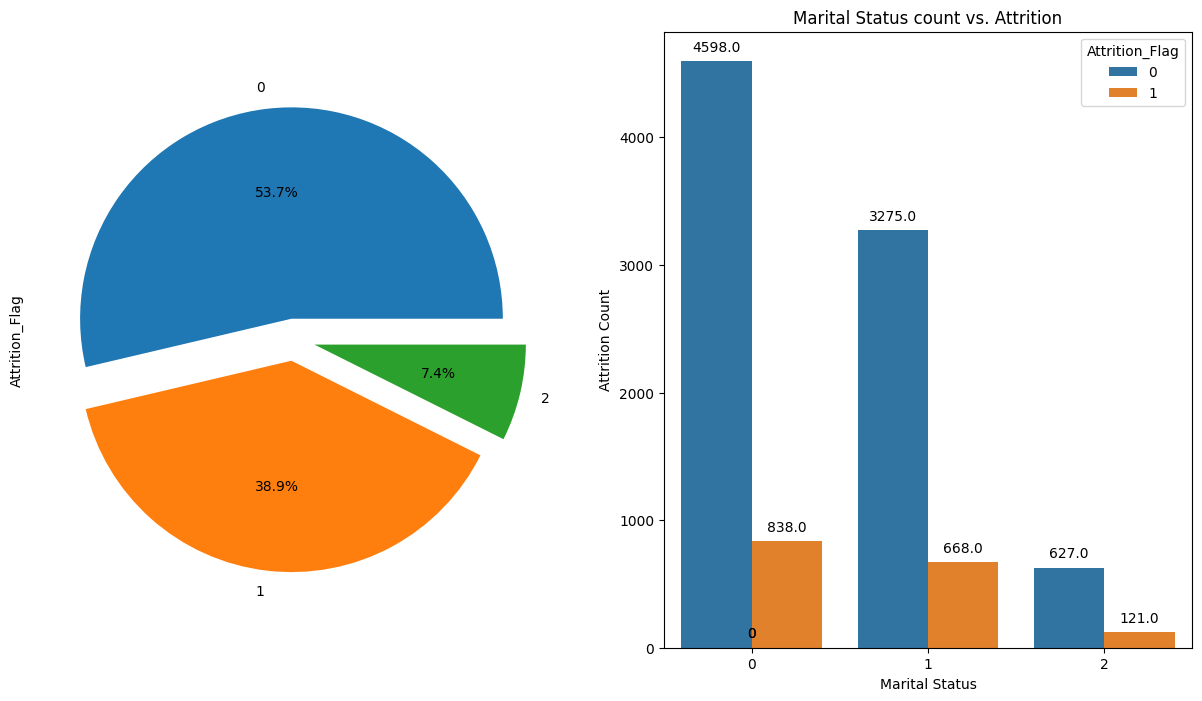

In [ ]:
# Marital Status vs Attrition using countplot

# Defining the figure
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

explode = [0.1, 0.1, 0.1]

cards_df.groupby('Marital_Status')['Attrition_Flag'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);
ax = sns.countplot(x="Marital_Status", hue="Attrition_Flag", data=cards_df,ax=axb[1])

# Adding values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Setting labels and title
plt.title("Marital Status count vs. Attrition")
plt.xlabel("Marital Status")
plt.ylabel("Attrition Count")

# Showing the plot
plt.show()

Customers with marital status 2 'Divorced' have a higher attrition rate.

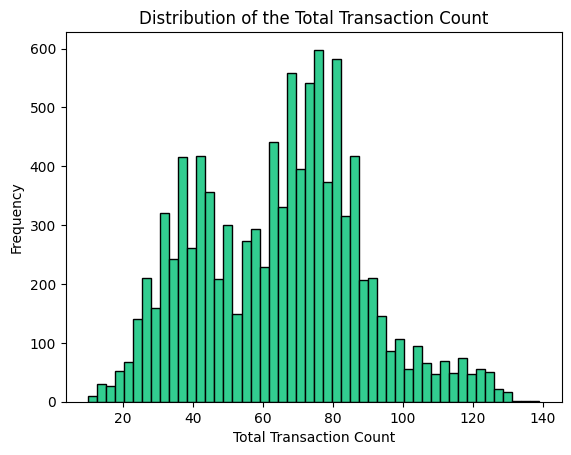

In [ ]:
# 4.6. Total_Trans_Ct

# Distribution using Histogram

plt.hist(cards_df['Total_Trans_Ct'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Total Transaction Count')

plt.ylabel('Frequency')

plt.title('Distribution of the Total Transaction Count')

plt.show()

In [ ]:
# 4.6. Total_Trans_Ct

# Distribution using Histogram

plt.hist(cards_df['Total_Trans_Ct'], bins=50, color='#32CD90', edgecolor='black')

plt.xlabel('Total Transaction Count')

plt.ylabel('Frequency')

plt.title('Distribution of the Total Transaction Count')

plt.show()

Part 5: Creating the Model

5.1. Using the Decision Tree

In [ ]:
# Importing the 'train_test_split' and 'DecisionTreeRegressor' is placed in the first code block

# Setting the x as the
x = cards_df.Total_Trans_Ct
y = cards_df.Attrition_Flag

x = cards_df.Total_Trans_Ct.values.reshape(-1, 1)

# Splitting the dataset into 4 sub-datasets
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=0)

# Defining the model
melbourne_model = DecisionTreeRegressor()

# Fitting the model into train x and train y ONLY, NOT the whole dataset
melbourne_model.fit(train_x, train_y)

# Displaying the first 5 rows for the features' training sub-dataset
print("The features training sub-dataset is:\n\n", train_x)

print("\nThe predictions for the features' testing sub-dataset are:\n", melbourne_model.predict(test_x).round())

# Mean absolute error

# Importing the 'mean_absolute_error' is placed in the fist code block

print("\nThe mean absolute error equals", mean_absolute_error(test_y, melbourne_model.predict(test_x)))

The features training sub-dataset is:

 [[ 77]
 [ 82]
 [ 31]
 ...
 [ 67]
 [119]
 [ 37]]

The predictions for the features' testing sub-dataset are:
 [0. 0. 0. ... 0. 0. 0.]

The mean absolute error equals 0.19894814858421983


In [ ]:
# Importing the 'LogisticRegression', 'accuracy_score', 'classification_report', and 'confusion_matrix' are placed in the first code block

# Predicting probabilities of the positive class (class 1)
y_pred_prob = melbourne_model.predict(test_x)
threshold = 0.5

# Using the custom threshold to make binary predictions
y_pred_custom = (y_pred_prob >= threshold).astype(int)

# Evaluating the model's performance
print("Accuracy:", accuracy_score(test_y, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(test_y, y_pred_custom))
print("\nClassification Report:\n", classification_report(test_y, y_pred_custom))

Accuracy: 0.8645339652448657

Confusion Matrix:
 [[2061   87]
 [ 256  128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      2148
           1       0.60      0.33      0.43       384

    accuracy                           0.86      2532
   macro avg       0.74      0.65      0.68      2532
weighted avg       0.84      0.86      0.85      2532



Note, before dropping the 'CLIENTNUM', the accuracy was 0.2 for the DecisionTree.

5.2. Using the Logistic Regression

In [ ]:
# Separate features (X) and target (y)
X = cards_df.drop(columns=['Attrition_Flag'])  # Features
y = cards_df['Attrition_Flag']  # Target

***SMOTE*** is used for ***Imbalanced Classification***,  which involves developing predictive models on classification datasets that have a **severe class imbalance**.

One approach to addressing imbalanced datasets is to ***oversample*** the minority class.

This type of data augmentation for the minority class and is referred to as ***SMOTE***.

In [ ]:
# SMOTE

# Importing SMOTE is placed in the first code block

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print(f"Before SMOTE: {y_resampled.value_counts()}")
print(f"After SMOTE: {y_test.value_counts()}")

Before SMOTE: 0    8500
1    8500
Name: Attrition_Flag, dtype: int64
After SMOTE: 0    2550
1    2550
Name: Attrition_Flag, dtype: int64


In [ ]:
# Importing the LogisticRegression is placed in the first code block

# Fitting the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predicting probabilities of the positive class (class 1)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
threshold = 0.5

# Using the custom threshold to make binary predictions
y_pred_custom = (y_pred_prob >= threshold).astype(int)

# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))

Accuracy: 0.8250980392156863

Confusion Matrix:
 [[2077  473]
 [ 419 2131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2550
           1       0.82      0.84      0.83      2550

    accuracy                           0.83      5100
   macro avg       0.83      0.83      0.83      5100
weighted avg       0.83      0.83      0.83      5100

